https://www.youtube.com/watch?v=gKspuNylqrs&list=LL

In [1]:
'''

This code aims to plot gravity & magnetic anomaly and perform filtering

by:
arif.darmawan@riflab.com
9 February 2023

'''

'\n\nThis code aims to plot gravity & magnetic anomaly and perform filtering\n\nby:\narif.darmawan@riflab.com\n9 February 2023\n\n'

In [2]:
# import matplotlib.pyplot as plt
# from matplotlib.pyplot import figure
import pandas as pd
# import numpy as np
# import rasterio
# from scipy.interpolate import griddata
# from rasterio.transform import Affine
# from rasterio.crs import CRS
# import interpies
from module import create_grid, plot_demnas, set_map
from module_parasnis import parasnis

### 1. Input and Output File

#### 1.1. Gravity Database

In [3]:
data_file = '../../../data/data_gravity/satellite_gravity_can.xlsx'
# data_file = '../../../data/data_gravity/s2g_pth.xlsx'
# data_file = '../../../data/data_gravity/2020_gravity_pth.xlsx'
# data_file = '../../../data/data_gravity/Book1.xlsx'

#### 1.2. Elevation Model

In [16]:
# file_demnas = '../map/DEMNAS_1208-54_v1.0_PTH.tif'
# file_demnas = '../map/s08_e107_1arc_v3.tif'
file_demnas = '../map/DEMNAS_1408-44_v1.0_DNG.tif'

#### 1.3. Output Geotiff 

In [17]:
file_output_prefix = '../map/patuha_grav_'

### 2. Read database

In [18]:
df = pd.read_excel(data_file, sheet_name='A', header=0, na_values=None)

In [19]:
X = 'Longitude'
Y = 'Latitude'
epsg = 4326 #32748 #32749

### 3. Plot Topography Map

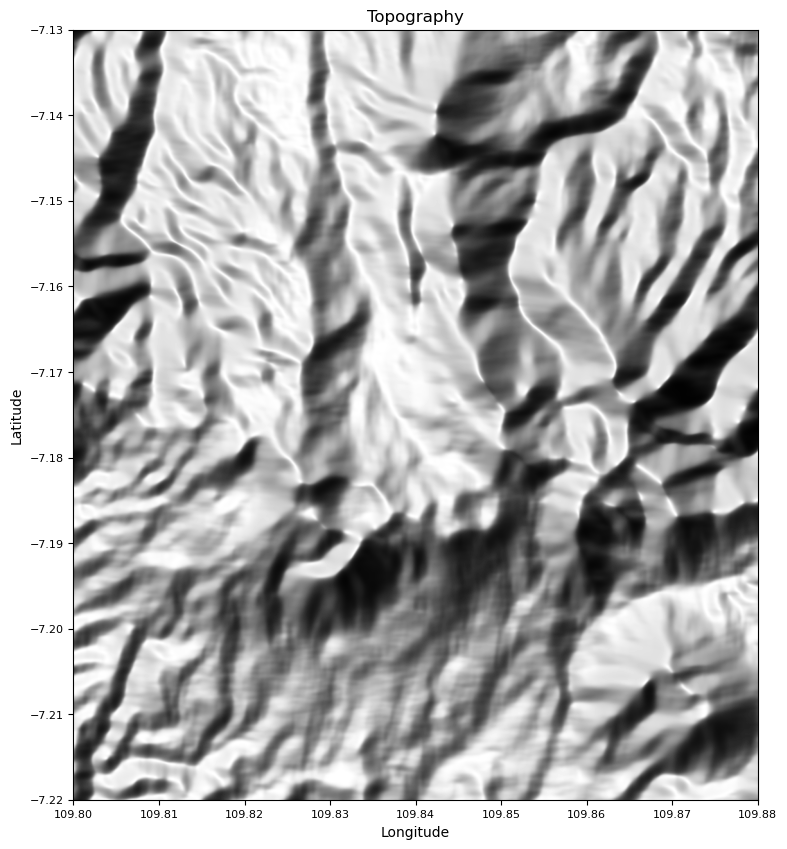

In [20]:
plot_demnas(file_demnas, df, X=X, Y=Y, station=False)

In [9]:
# 'Z', 'Gobs', 'FAA',
# 'Elevation DEMNAS', 'Gravity Disturbances', 'Gravity Accelerations', 'NS DoVs', 'EW DoVs',
# 'CBA 1.00', 'CBA 2.00', 'CBA 2.10', 'CBA 2.20', 'CBA 2.30', 'CBA 2.40', 'CBA 2.50', 'CBA 2.60', 'CBA 2.67'
# 'SBA 1.00', 'SBA 2.00', 'SBA 2.10', 'SBA 2.20', 'SBA 2.30', 'SBA 2.40', 'SBA 2.50', 'SBA 2.60', 'SBA 2.67'
# 'Z', 'Z_0', 'Z_1'
# 'SBA 2.20', 'SBA 2.67'
# 'Z', 'Gobs', 'FAA', 'SBA2.67'
# 'Z', 'Quasigeoid', 'Gobs', 'FAA', 'SBA 2.67'
# 'Z'
# 'Elevation DEMNAS'
# 'CBA 2.00'

### 4. Calculate Average Density

In [10]:
Xad = (0.04192 * df['Elevation DEMNAS']) #- df['TC_1.00']
Yad = df['Gravity Disturbances']
# Yad = df['Full']

In [11]:
# parasnis(Xad, Yad)

### 5. Anomaly Gravity

In [12]:
gen_maps = 'SBA 2.20'

file_output = file_output_prefix + gen_maps + '.tiff'
grid1 = create_grid(gen_maps, df, file_output, name=gen_maps, X=X, Y=Y, epsg=epsg, masking=True) 

#### 5.1 Anomaly Bouguer

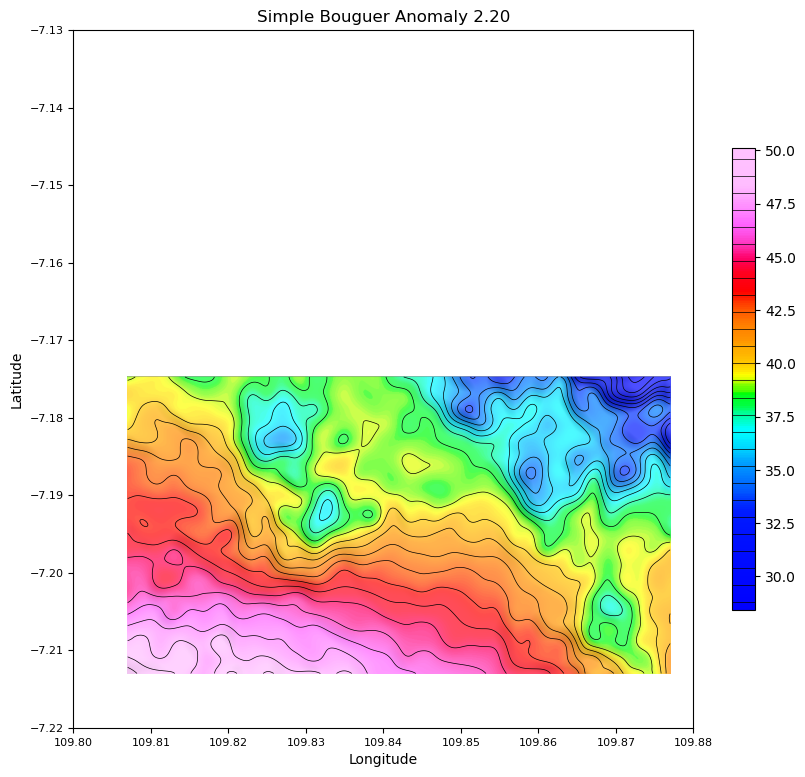

In [13]:
ax1 = grid1.up(z=0.0009)
ax1 = ax1.smooth(method='SG', deg=3, win=21, doEdges=True, sigma=1)
ax1 = ax1.show(
                cmap_norm='equalize', 
                contours=True,
                cb_contours=True, 
                azdeg=315, altdeg=45, 
                title='Simple Bouguer Anomaly ' + gen_maps[-4:],
                zf=5,
                figsize=(10, 10),
                cmap='geosoft',
                alpha=0.7, 
                hs_contrast=1.5,
                )
set_map(ax1, frame=True, dxdy=0.01)

# ax1.plot(df[X], df[Y], color='black', linestyle='None', marker='+', markersize=1, alpha=0.5) 

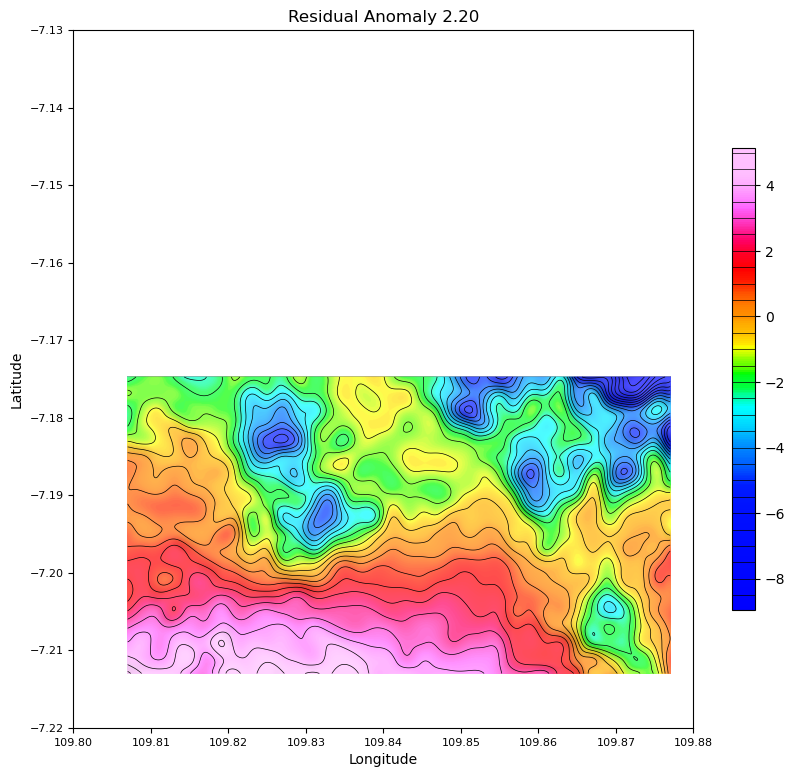

In [14]:
ax1 = grid1.hp_filter_uc(z=0.047222)
ax1 = ax1.up(z=0.0009)
ax1 = ax1.smooth(method='SG', deg=3, win=21, doEdges=True, sigma=1)
ax1 = ax1.show(
                cmap_norm='equalize', 
                contours=True,
                cb_contours=True, 
                azdeg=315, altdeg=45, 
                title='Residual Anomaly ' + gen_maps[-4:],
                zf=5,
                figsize=(10, 10),
                cmap='geosoft',
                alpha=0.7, 
                hs_contrast=1.5,
                )
set_map(ax1, frame=True, dxdy=0.01)

# ax1.plot(df[X], df[Y], color='black', linestyle='None', marker='+', markersize=2, alpha=0.5)

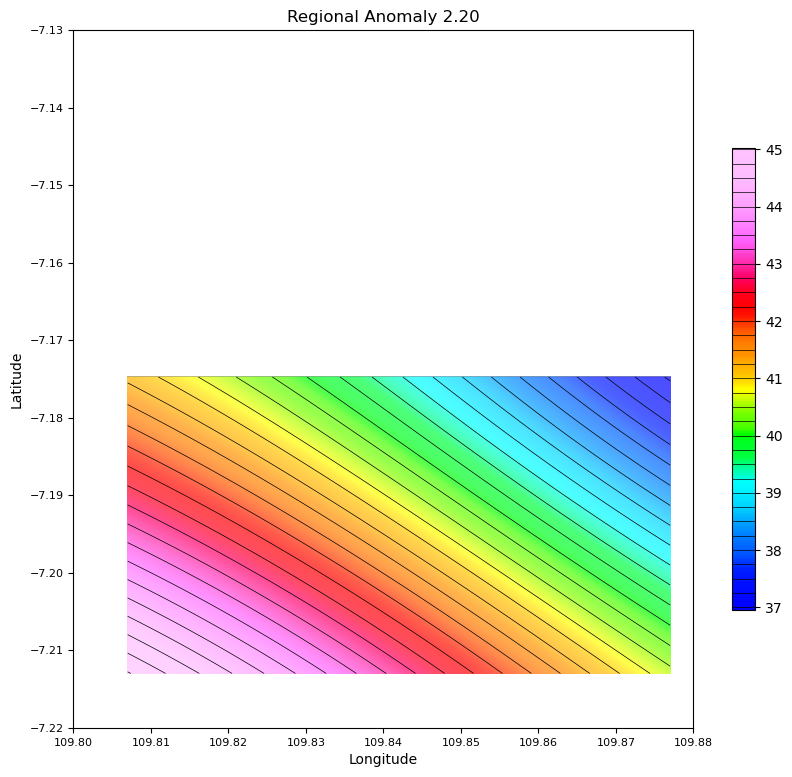

In [15]:
ax1 = grid1.up(z=0.047222)
    # ax1 = ax1.dxdy(
    #                 method='SG', 
    #                 deg=11, 
    #                 win=21, 
    #                 doEdges=True, 
    #                 fs_tap=5
    #                 )
ax1 = ax1.smooth(method='SG', deg=3, win=21, doEdges=True, sigma=1)
ax1 = ax1.show(
                cmap_norm='equalize', 
                contours=True,
                cb_contours=True, 
                azdeg=315, altdeg=45, 
                title='Regional Anomaly ' + gen_maps[-4:],
                zf=5,
                figsize=(10, 10),
                cmap='geosoft',
                alpha=0.7, 
                hs_contrast=1.5,
                )
set_map(ax1, frame=True, dxdy=1000)

# ax1.plot(df[X], df[Y], color='black', linestyle='None', marker='+', markersize=2, alpha=0.5)